# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns



In [2]:
from sklearn.cluster import KMeans

# Data Collection and Analysis

In [3]:
df=pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
# shape of dataset
df.shape

(200, 5)

In [7]:
print("Numbers of Rows in a dataset:",df.shape[0])
print("Numbers of Columns in a dataset:",df.shape[1])

Numbers of Rows in a dataset: 200
Numbers of Columns in a dataset: 5


In [8]:
#info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
# statistical measures of dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# plot displot of Age ,Annual Income and Spending Score

C:\Users\GUNGUN WADHWA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GUNGUN WADHWA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GUNGUN WADHWA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

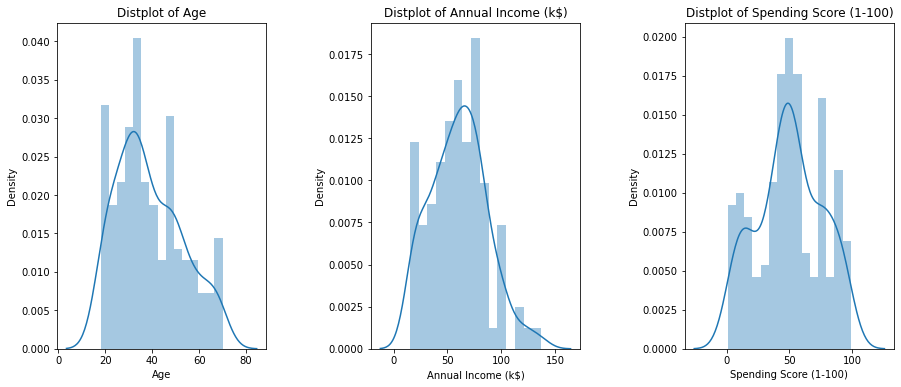

In [12]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

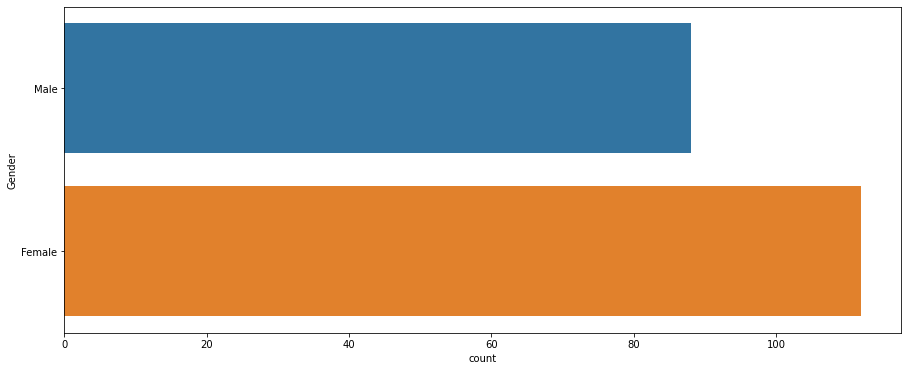

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(y = 'Gender' , data = df)
plt.show()

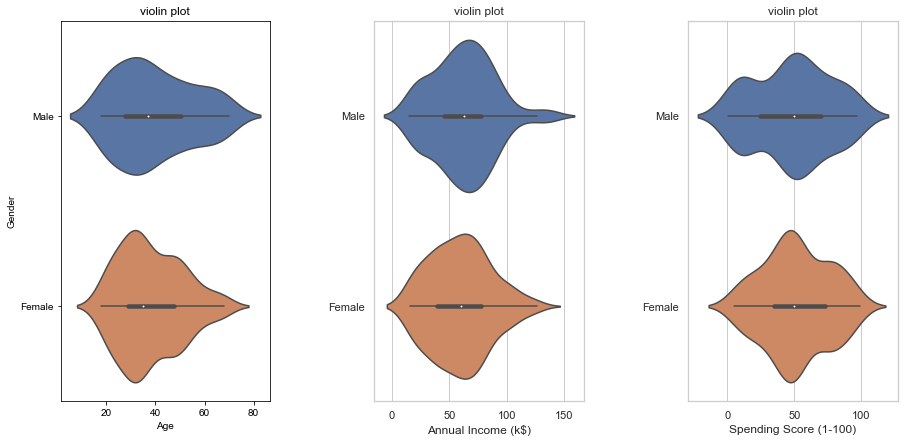

In [14]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x=x,y='Gender',data=df)
    plt.ylabel('Gender' if n==1 else '')
    plt.title('violin plot')
plt.show()

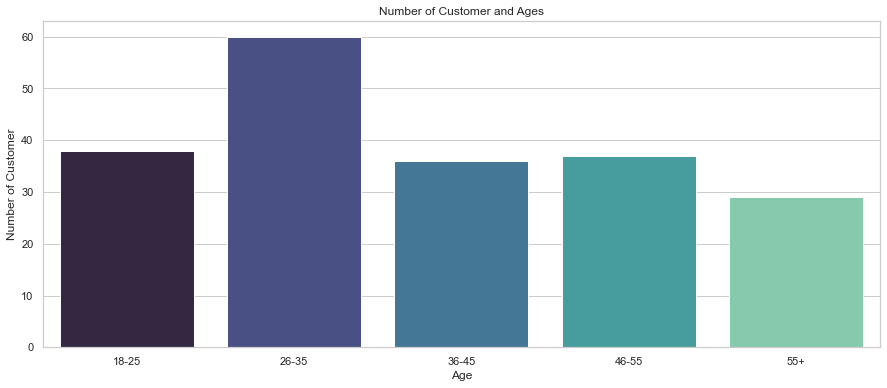

In [15]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),
len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

# Clustring customers based on Annual income and spending score

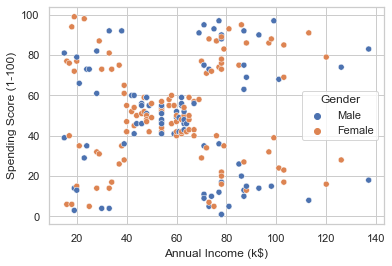

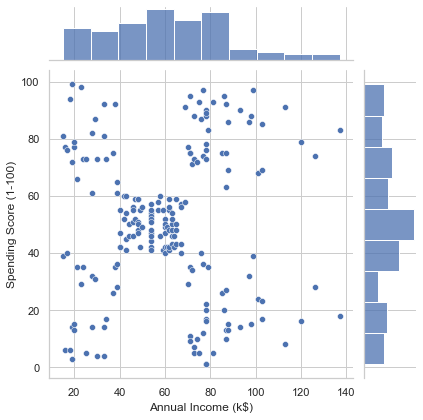

In [16]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
sns.jointplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

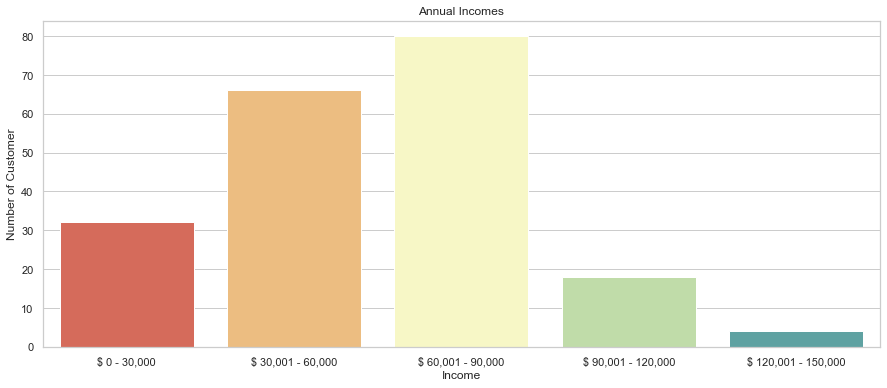

In [17]:
income0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
income31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
income61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
income91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
income121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

x1 = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
y1 = [len(income0_30.values), len(income31_60.values), len(income61_90.values), len(income91_120.values), len(income121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x1, y=y1, palette="Spectral")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

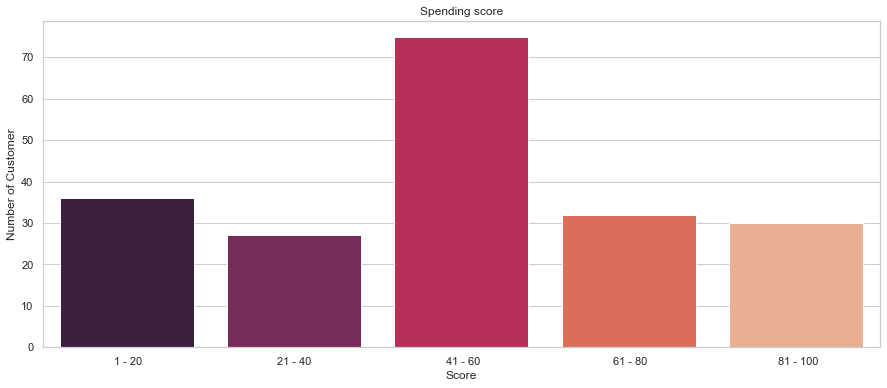

In [18]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

x2 = [" 1 - 20", "21 - 40", " 41 - 60", " 61 - 80", " 81 - 100"]
y2 = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x2, y=y2, palette="rocket")
plt.title("Spending score")
plt.xlabel("Score")
plt.ylabel("Number of Customer")
plt.show()

# Elbow method

C:\Users\GUNGUN WADHWA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


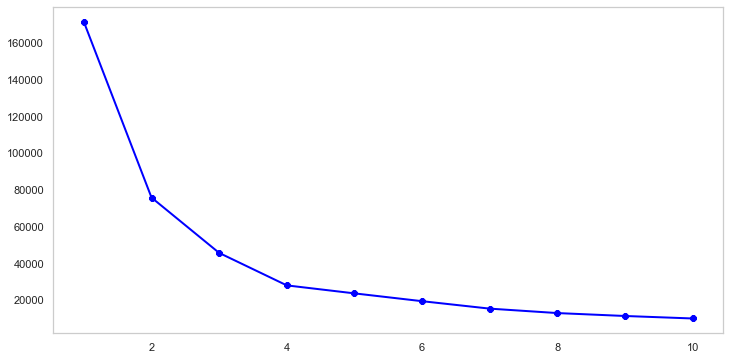

In [19]:
X1 = df.loc[:,['Age' , 'Spending Score (1-100)']].values
from sklearn.cluster import KMeans
wcss = []
s_scores = []
for k in range(1 , 11):
    kmeans = KMeans(n_clusters=k, init = 'k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='blue',marker='8')
plt.xlabel=("k-value")
plt.ylabel=('wcss')
plt.show()

In [20]:
kmeans = KMeans(n_clusters =4)
label= kmeans.fit_predict(X1)

print(label)

[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [21]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]]


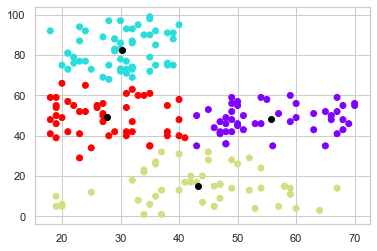

In [22]:
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title=('clustures of customer')
plt.ylabel=('Spending Score')
plt.xlabel=('age')
plt.show()

C:\Users\GUNGUN WADHWA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


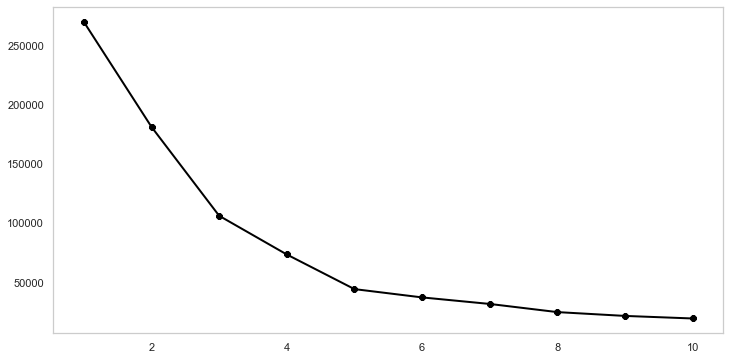

In [23]:
X2 = df.loc[:,['Annual Income (k$)' , 'Spending Score (1-100)']].values
from sklearn.cluster import KMeans
wcss = []

for k in range(1 , 11):
    kmeans = KMeans(n_clusters=k, init = 'k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='black',marker='8')
plt.xlabel=("k-value")
plt.ylabel=('wcss')
plt.show()

In [24]:
kmeans = KMeans(n_clusters =5)
label= kmeans.fit_predict(X1)

print(label)

[3 1 4 1 0 1 4 1 4 1 4 1 4 1 4 1 0 3 0 1 0 1 4 1 4 1 0 3 0 1 4 1 4 1 4 1 4
 1 0 1 2 1 0 3 0 3 2 3 3 0 2 3 3 2 2 0 2 2 3 2 2 3 2 2 2 3 0 2 3 3 2 0 2 2
 2 3 2 0 3 0 2 3 2 0 3 2 2 3 3 2 2 3 2 0 0 3 2 3 0 3 3 2 2 3 2 3 2 2 2 2 2
 3 0 3 3 3 2 2 2 2 3 0 3 1 0 1 0 1 4 1 4 1 0 1 4 1 4 1 4 1 4 1 0 1 4 1 0 1
 4 1 4 1 4 1 4 1 4 1 4 1 2 1 4 1 0 1 4 1 0 3 4 1 4 1 4 1 4 1 4 1 0 1 4 1 0
 1 4 1 4 1 4 1 4 1 4 1 0 1 4 1]


In [25]:
print(kmeans.cluster_centers_)

[[40.19354839 36.5483871 ]
 [30.1754386  82.35087719]
 [57.82051282 49.92307692]
 [25.32352941 53.05882353]
 [43.28205128 11.84615385]]


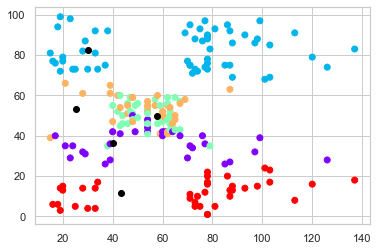

In [26]:
plt.scatter(X2[:,0],X1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title=('clustures of customer')
plt.ylabel=('Spending Score')
plt.xlabel=('Annual Income (k$)')
plt.show()

C:\Users\GUNGUN WADHWA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


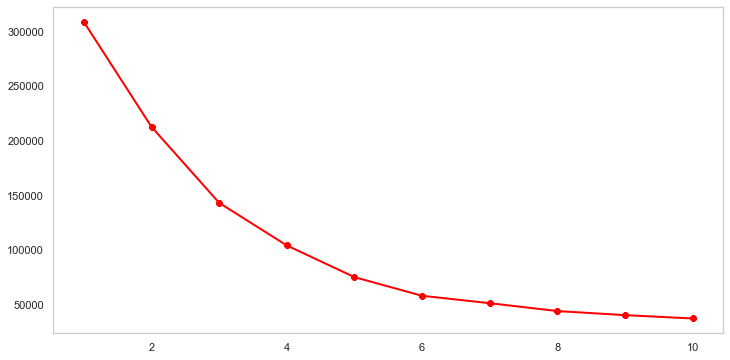

In [27]:
X3 = df.iloc[:,2:]
from sklearn.cluster import KMeans
wcss = []

for k in range(1 , 11):
    kmeans = KMeans(n_clusters=k, init = 'k-means++')
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel=("k-value")
plt.ylabel=('wcss')
plt.show()

 # Building the model

In [28]:
kmeans = KMeans(n_clusters =5)
label= kmeans.fit_predict(X1)

print(label)

[2 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 4 2 4 0 4 0 1 0 1 0 4 2 4 0 1 0 1 0 1 0 1
 0 4 0 3 0 4 2 4 2 3 2 2 2 3 2 2 3 4 4 3 3 2 3 3 2 3 3 3 2 4 3 2 2 3 4 3 3
 3 2 4 4 2 4 3 2 3 4 2 4 3 2 2 4 3 2 4 4 2 2 4 2 4 2 2 4 3 2 3 2 3 3 3 3 3
 2 4 2 2 2 3 3 4 3 2 4 2 0 2 0 4 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 2 0 1 0 4 0
 1 0 1 0 1 0 1 0 1 0 1 0 4 0 1 0 4 0 1 0 4 2 1 0 1 0 1 0 1 0 1 0 4 0 1 0 4
 0 1 0 1 0 1 0 1 0 1 0 4 0 1 0]


In [29]:
print(kmeans.cluster_centers_)

[[30.1754386  82.35087719]
 [43.28205128 11.84615385]
 [25.775      50.775     ]
 [60.36666667 51.16666667]
 [44.70588235 38.76470588]]


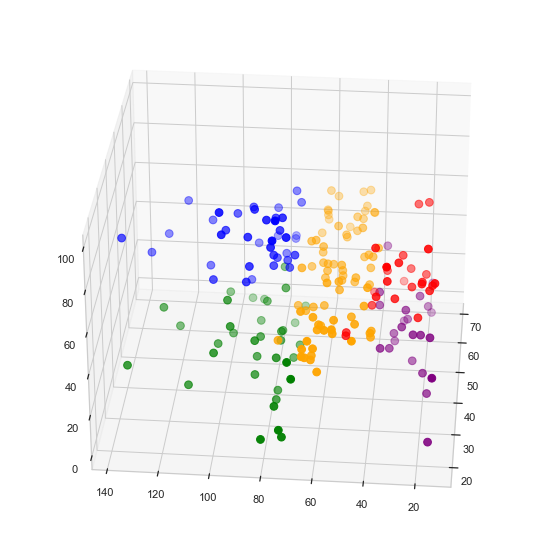

In [30]:
cluster=kmeans.fit_predict(X3)
df['label']=cluster
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel=("Age")
plt.ylabel=("Annual Income (k$)")
ax.set_zlabel=('Spending Score (1-100)')
plt.show()